# MNIST CNN models

In [17]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sns
import sklearn.metrics as skm

from helpers.mnist_loader import loadMNISTDatasets, getMNISTLoaders
import helpers.evaluation as evaluation

import models.CNN as CNNs

In [2]:
#sns.set_theme(style="darkgrid")
sns.set_palette("colorblind")
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [3]:
train_dataset, val_dataset, holdback_dataset = loadMNISTDatasets()
_,_, holdback_loader = getMNISTLoaders([train_dataset, val_dataset, holdback_dataset],batch_size=1000)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#### Load training data

In [5]:
res = pd.read_csv('results/cnns.csv', index_col=0, usecols=[0,2,3,4,5,6,10])
res.head()

,epoch,loss,val_loss,accuracy,val_accuracy,model
0,1,1.0660,0.4316,0.7324,0.8894,LeNet5
1,2,0.7054,0.3538,0.8188,0.9064,LeNet5
2,3,0.5471,0.2999,0.8574,0.9190,LeNet5
3,4,0.4516,0.2607,0.8813,0.9284,LeNet5
4,5,0.3870,0.2321,0.8976,0.9360,LeNet5


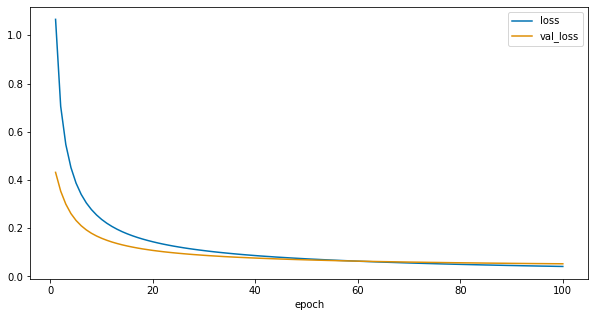

In [6]:
res[res.model == 'LeNet5'].plot(x='epoch', y=['loss', 'val_loss'])
plt.show()

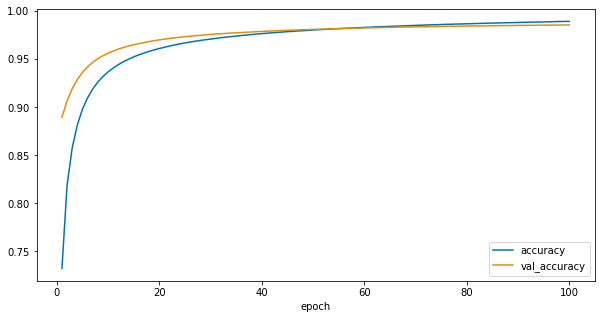

In [7]:
res[res.model == 'LeNet5'].plot(x='epoch', y=['accuracy', 'val_accuracy'])
plt.show()

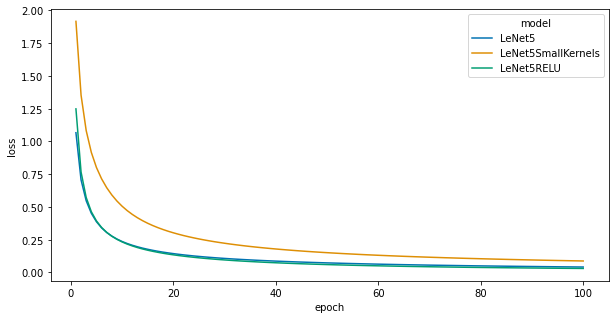

In [8]:
sns.lineplot(data=res, x="epoch", y='loss', hue="model")
plt.show()

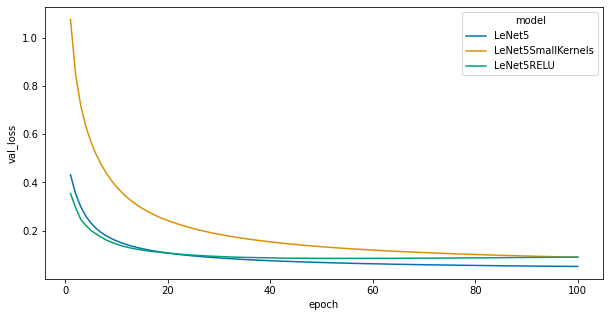

In [9]:
sns.lineplot(data=res, x="epoch", y='val_loss', hue="model")
plt.show()

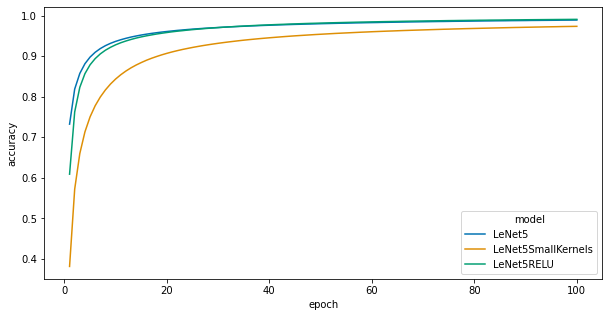

In [10]:
sns.lineplot(data=res, x="epoch", y='accuracy', hue="model")
plt.show()

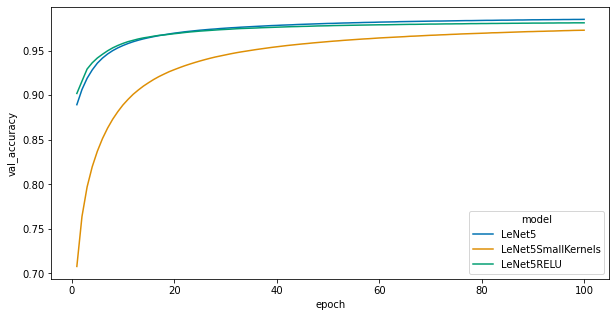

In [11]:
sns.lineplot(data=res, x="epoch", y='val_accuracy', hue="model")
plt.show()

In [12]:
model = CNNs.LeNet5().to(device)
evaluation.loadModel(model, 'model_LeNet5_learning_rate_0.01_batch_size_32_optimizer_sgd');

In [13]:
cms = evaluation.ComputeConfusionMatrices(model, holdback_loader)

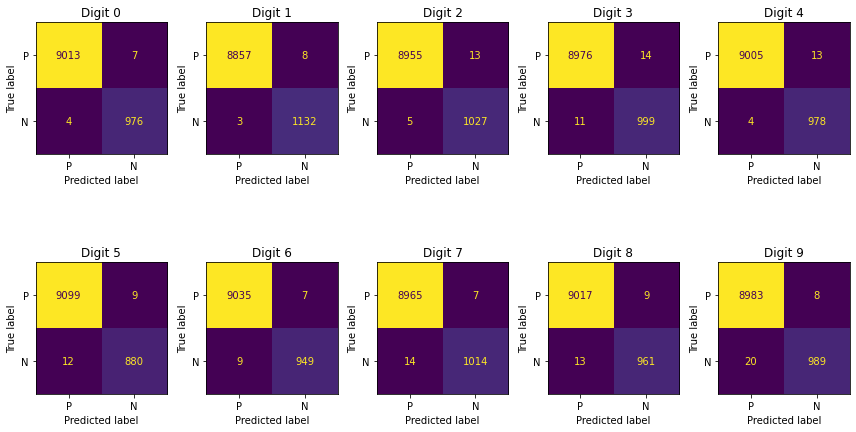

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(12, 7))
    
for cm, axes, title in zip(cms, ax.flatten(), list(range(10))):
    axes.title.set_text(f'Digit {title}')
    skm.ConfusionMatrixDisplay(cm, display_labels=['P', 'N']).plot(ax=axes, colorbar=False)

fig.tight_layout()
plt.show()

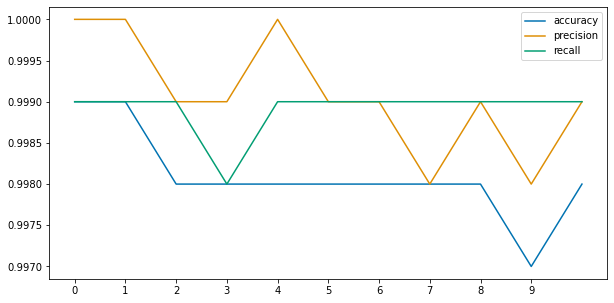

In [15]:
result = evaluation.getPerformanceMetrics(cms)
result[['accuracy', 'precision', 'recall']].plot(xticks=[0,1,2,3,4,5,6,7,8,9])
plt.show()

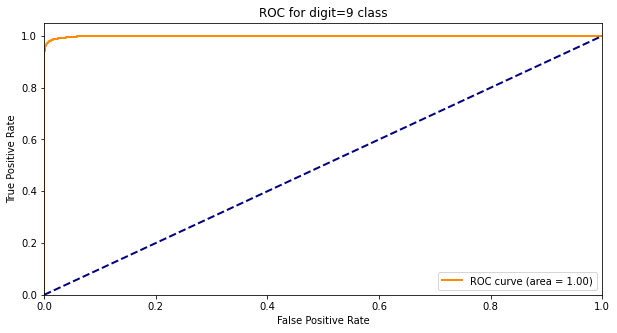

In [16]:
which_class = 9
actuals, class_probabilities = evaluation.test_class_probabilities(model, holdback_loader, which_class)

fpr, tpr, _ = skm.roc_curve(actuals, class_probabilities)
roc_auc = skm.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for digit=%d class' % which_class)
plt.legend(loc="lower right")
plt.show()

In [18]:
evaluation.validate(model, F.cross_entropy, holdback_loader)


HoldBackSet: Avg. loss: 0.0000, Accuracy: 0.9905 (99.1%)



In [19]:
model = CNNs.LeNet5RELU().to(device)
evaluation.loadModel(model, 'model_LeNet5RELU_learning_rate_0.01_batch_size_32_optimizer_sgd');

In [20]:
evaluation.validate(model, F.cross_entropy, holdback_loader)


HoldBackSet: Avg. loss: 0.0001, Accuracy: 0.988 (98.8%)



In [21]:
model = CNNs.LeNet5SmallKernels().to(device)
evaluation.loadModel(model, 'model_LeNet5SmallKernels_learning_rate_0.01_batch_size_32_optimizer_sgd');

In [22]:
evaluation.validate(model, F.cross_entropy, holdback_loader)


HoldBackSet: Avg. loss: 0.0000, Accuracy: 0.9894 (98.9%)

